Load Datashet

### 1. Data Exploration & Visualization

DATASET DISTRIBUTION
Cat Images = 5000
Dog Images = 5000
Total Images = 10000
Balance Ration = 1.00


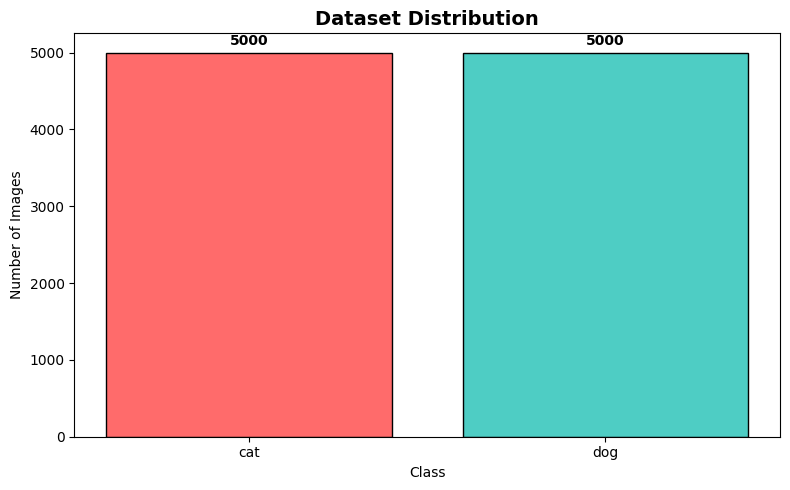


Sample Images


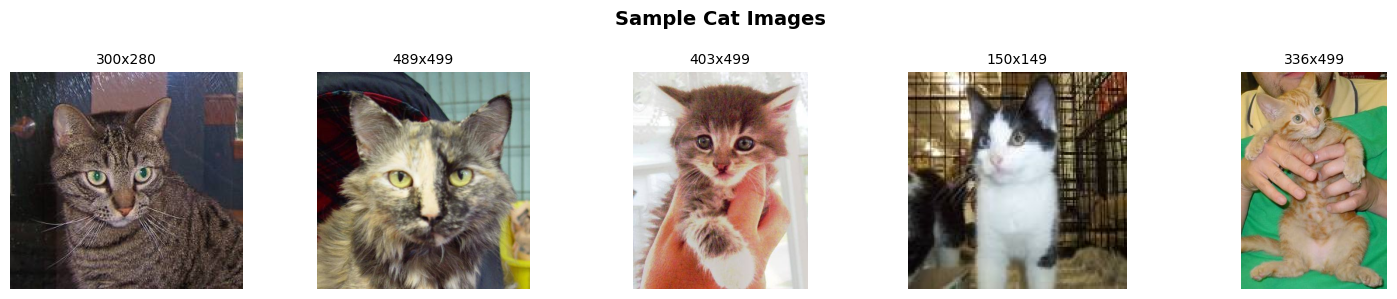

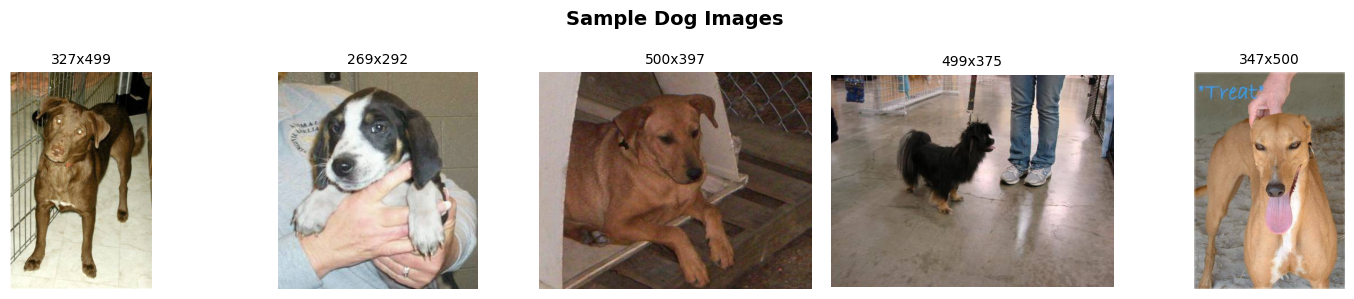


IMAGE SIZE ANALYSIS
Found 500 images in ../datashet\cat
Succesfullt loaded: 500 | Errors: 0
Found 500 images in ../datashet\dog
Succesfullt loaded: 500 | Errors: 0
Width - Min: 59, Max: 500, Mean: 405
Height - Min: 45, Max: 500, Mean: 365


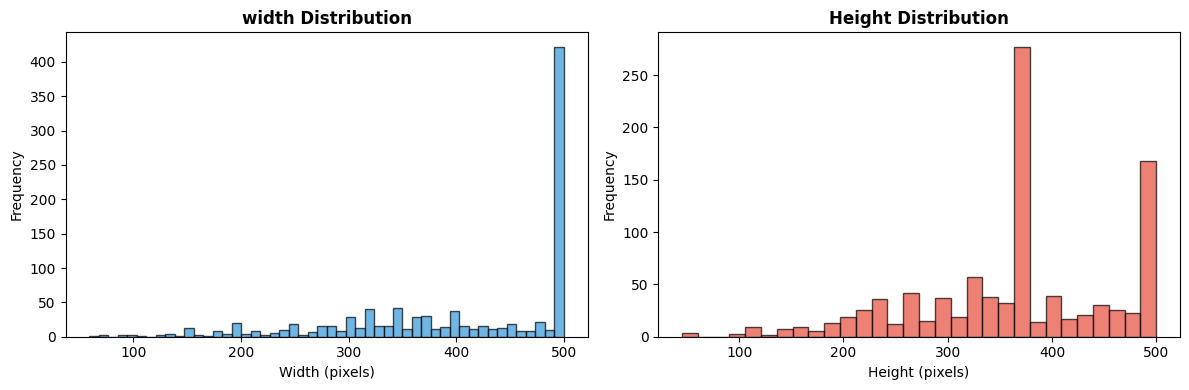

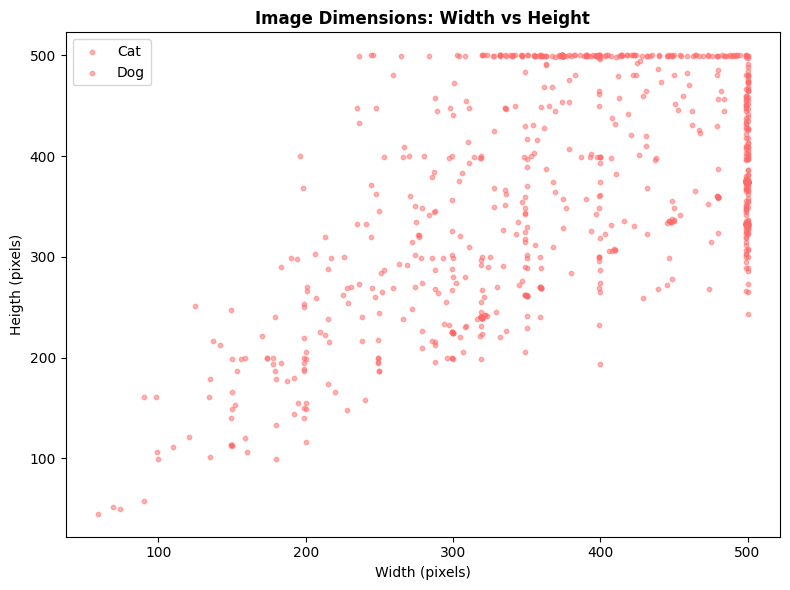


CHECKING FOR CORRUPT IMAGES
Corrupt cat images: 5000
Corrupt dog images: 5000
Cat Files: ['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg']...
Dog Files: ['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg']...

 EXPLORATION SUMMARY
Total Images: 10000
Dataset balanced: Yes
Average size: 405x365
Corrupt images: 10000
Recommended resize: 150x150 or 224x224


In [11]:
import os
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
from collections import Counter 

#1.1  Setup path
DATA_DIR = "../datashet"
CAT_DIR = os.path.join(DATA_DIR, "cat")
DOG_DIR = os.path.join(DATA_DIR, "dog")

#1.2 Distribution check datashet
cat_images = os.listdir(CAT_DIR)  
dog_images = os.listdir(DOG_DIR)  

print("=" * 50)
print("DATASET DISTRIBUTION")
print("=" * 50)
print(f"Cat Images = {len(cat_images)}")
print(f"Dog Images = {len(dog_images)}")
print(f"Total Images = {len(cat_images) + len(dog_images)}")
print(f"Balance Ration = {len(cat_images) / len(dog_images):.2f}")

# Distribution visualization
plt.figure(figsize=(8, 5))
classes = ['cat', 'dog']
counts = [len(cat_images), len(dog_images)]
colors = ['#FF6B6B', '#4ECDC4']
plt.bar(classes, counts, color=colors, edgecolor='black')
plt.title('Dataset Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Number of Images')
for i, v in enumerate(counts):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


#1.3 Visualization Sample Images
def show_sample_images(folder, title, n=5):
    """Display sample images form a folder"""
    images = os.listdir(folder)[:n]
    fig, axes = plt.subplots(1, n, figsize=(15, 3))
    fig.suptitle(title, fontsize=14, fontweight='bold') 

    for ax, img_name in zip(axes, images):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(f"{img.size[0]}x{img.size[1]}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

print("\n" + "=" * 50)
print("Sample Images")
print("=" * 50)
show_sample_images(CAT_DIR, "Sample Cat Images")
show_sample_images(DOG_DIR, "Sample Dog Images")


#1.4 Analyze Size & Resolution Images 
def analyze_image_sizes(folder, label, sample_size=500):
    """Analyze Image Dimensions in a Folder"""
    # Debug
    if not os.path.exists(folder):
        print(f"Folder tidak ditemukan: {folder}")
        return [], []
    
    images = os.listdir(folder)[:sample_size]

    # Debug 
    print(f"Found {len(images)} images in {folder}")

    widths = []
    heights = []
    error_count = 0

    for img_name in images:
        img_path = os.path.join(folder, img_name)
        try:
            with Image.open(img_path) as img:
                widths.append(img.size[0])
                heights.append(img.size[1]) 
        except Exception as e:
            error_count += 1
            if error_count <= 3:
                print(f"Error Loading: {img_name}: {e}")
    
    print(f"Succesfullt loaded: {len(widths)} | Errors: {error_count}")
    return widths, heights

print("\n" + "=" * 50) 
print("IMAGE SIZE ANALYSIS")

cat_widths, cat_heights = analyze_image_sizes(CAT_DIR, "cat")
dog_widths, dog_heights = analyze_image_sizes(DOG_DIR, "dog")

all_widths = cat_widths + dog_widths
all_heights = cat_heights + dog_heights

# Checking
if len(all_widths) == 0:
    print("Tidak ada gambar yang berhasil di load")
    print(f"Cek path: {DATA_DIR}")
else:
    print(f"Width - Min: {min(all_widths)}, Max: {max(all_widths)}, Mean: {np.mean(all_widths):.0f}")
    print(f"Height - Min: {min(all_heights)}, Max: {max(all_heights)}, Mean: {np.mean(all_heights):.0f}")

# Visualization Distribution size
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(all_widths, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_title('width Distribution', fontweight='bold')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Frequency')

axes[1].hist(all_heights, bins=30, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1].set_title('Height Distribution', fontweight='bold')
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot width vs height
plt.figure(figsize=(8,6))
plt.scatter(cat_widths, cat_heights, alpha=0.5, label='Cat', color='#FF6B6B', s=10)
plt.scatter(dog_widths, dog_heights, alpha=0.5, label='Dog', color='#FF6B6B', s=10)
plt.xlabel('Width (pixels)')
plt.ylabel('Heigth (pixels)')
plt.title('Image Dimensions: Width vs Height', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

#1.5 Checking corrupt images
def check_corrupt_images(folder, label):
    """Check for corrupt images"""
    corrupt = []
    images = os.listdir(folder)

    for img_name in images: 
        img_path = os.path.join(folder, img_name)
        try: 
            with Image.oopne(img_path) as img:
                img.verify()
        except Exception as e:
            corrupt.append(img_name)

    return corrupt

print("\n" + "=" * 50)
print("CHECKING FOR CORRUPT IMAGES")
print("=" * 50)

corrupt_cats = check_corrupt_images(CAT_DIR, "cat")
corrupt_dogs = check_corrupt_images(DOG_DIR, "dog")

print(f"Corrupt cat images: {len(corrupt_cats)}")
print(f"Corrupt dog images: {len(corrupt_dogs)}")

if corrupt_cats:
    print(f"Cat Files: {corrupt_cats[:5]}...")
if corrupt_dogs:
    print(f"Dog Files: {corrupt_dogs[:5]}...")

#1.6 Summary 
print("\n" + "=" * 50)
print(" EXPLORATION SUMMARY")
print("=" * 50)
print(f"Total Images: {len(cat_images) + len(dog_images)}")
print(f"Dataset balanced: {'Yes' if 0.9 <= len(cat_images)/len(dog_images) <= 1.1 else 'No'}")
print(f"Average size: {np.mean(all_widths):.0f}x{np.mean(all_heights):.0f}")
print(f"Corrupt images: {len(corrupt_cats) + len(corrupt_dogs)}")
print(f"Recommended resize: 150x150 or 224x224")

### 2. Data Preprocessing

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as platform

In [6]:
#2.1 Configuration
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

print(f"Configuration Set:")
print(f"Target Size: {IMG_SIZE}")
print(f"Batch Size: {BATCH_SIZE}")

Configuration Set:
Target Size: (150, 150)
Batch Size: 32


In [7]:
#2.2 Define Preprocessing (Rescale Only)
preprocessor = ImageDataGenerator(rescale=1./255)

print("\nImageDataGenerator created with rescale=1./255")


ImageDataGenerator created with rescale=1./255


In [ ]:
#2.3 Load & Process Data
print("\nLoading and Processing Data")

dataset_generator = preprocessor.flow_from_directory(directory='../datashet', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=True)



Loading and Processing Data
Found 10000 images belonging to 2 classes.



DATA INSPECTION
Batch Shape: (32, 150, 150, 3)
(Batch Size, Height, Width, Channels)
Values Range: Min 0.00 - Max1.00
(Expected: 0.00 - 1.00)
Data Type: float32
Class Indices: {'cat': 0, 'dog': 1}


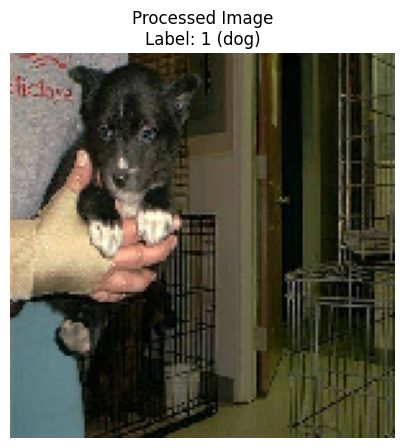


 Step 2 Complete: Images sucessfully resized, normalized, and converted to arrays


In [14]:
#2.4 Verify Data Preprocessing Report 
batch_images, batch_labels = next(dataset_generator)

print("\n" + "=" * 50)
print("DATA INSPECTION")
print("=" * 50)
print(f"Batch Shape: {batch_images.shape}")
print(f"(Batch Size, Height, Width, Channels)")
print(f"Values Range: Min {batch_images.min():.2f} - Max{batch_images.max():.2f}")
print(f"(Expected: 0.00 - 1.00)")
print(f"Data Type: {batch_images.dtype}")

# Mapping label
class_indices = dataset_generator.class_indices
print(f"Class Indices: {class_indices}")
label_map = {v: k for k, v in class_indices.items()}

# Visualization 
plt.figure(figsize=(5, 5))
plt.imshow(batch_images[0])
plt.title(f"Processed Image\nLabel: {int(batch_labels[0])} ({label_map[int(batch_labels[0])]})")
plt.axis('off')
plt.show()

print("\n Step 2 Complete: Images sucessfully resized, normalized, and converted to arrays")

## 3.Data Augmetation

Data Augmetation configuration
- Rotation: 0-40°
- Width/Height Shift: 20%
- Shear: 20%
- Zoom: 20%
- Horizontal Flip: Yes

Creating Data Generators...
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.

Dataset Split:
Training samples: 8000
Validation samples: 2000

AUGMENTED IMAGES PREVIEW


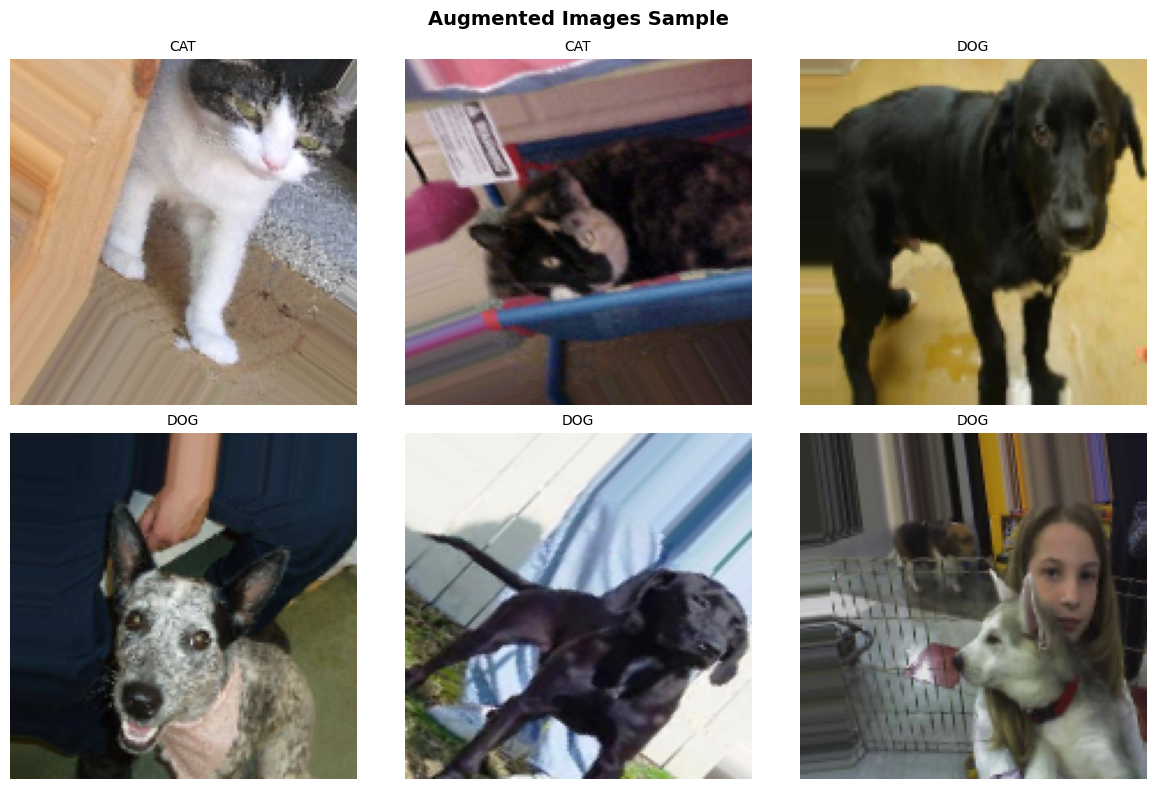

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

#3.1 Configuration
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
DATA_DIR = "../datashet"

#3.2 Define Augmetation Parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

print("Data Augmetation configuration")
print("- Rotation: 0-40°")
print("- Width/Height Shift: 20%")
print("- Shear: 20%")
print("- Zoom: 20%")
print("- Horizontal Flip: Yes")


#3.3 Create Data Generators
print("\nCreating Data Generators...")

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Validation Generator(without augmetation)
val_generator = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

print(f"\nDataset Split:")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")

#3.4 Visualize Augmentation Result
def show_augmented_images(generator, n_images=6):
    """Menampilkan gambar hasil augmentasi"""

    batch_images, batch_labels = next(generator)

    class_map = {v: k for k, v in generator.class_indices.items()}

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle('Augmented Images Sample', fontsize=14, fontweight='bold')

    for i, ax in enumerate(axes.flat):
        if i < n_images:
            ax.imshow(batch_images[i])
            label = class_map[int(batch_labels[i])]
            ax.set_title(f'{label.upper()}', fontsize=10)
            ax.axis('off')

    plt.tight_layout()
    plt.show()

print("\n" + "=" * 50)
print("AUGMENTED IMAGES PREVIEW")
print("=" * 50)
show_augmented_images(train_generator)

# Show Augmentation from same another images
def show_single_image_augmentation(image_path, n_augmentations=6):
    """Menampilkan beberapa variasi augmentasi dari 1 gambar"""
    from tensorflow.keras.preprocessing import image

    img = image.load_img(image_path, target_size=IMG_SIZE)
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    aug_gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle('Same Image - Different Augmentation', fontsize=14, fontweight='bold')

    i = 0 
    for batch in aug_gen.flow(x, batch_size=1):
        axes.flat[i].imshow(batch[0].astype('uint8'))
        axes.flat[i].axis('off')
        i += 1
        if i >= n_augmentations:
            break
    
    plt.tight_layout()
    plt.show()


Sample image: ../datashet\cat\cat.1007.jpg


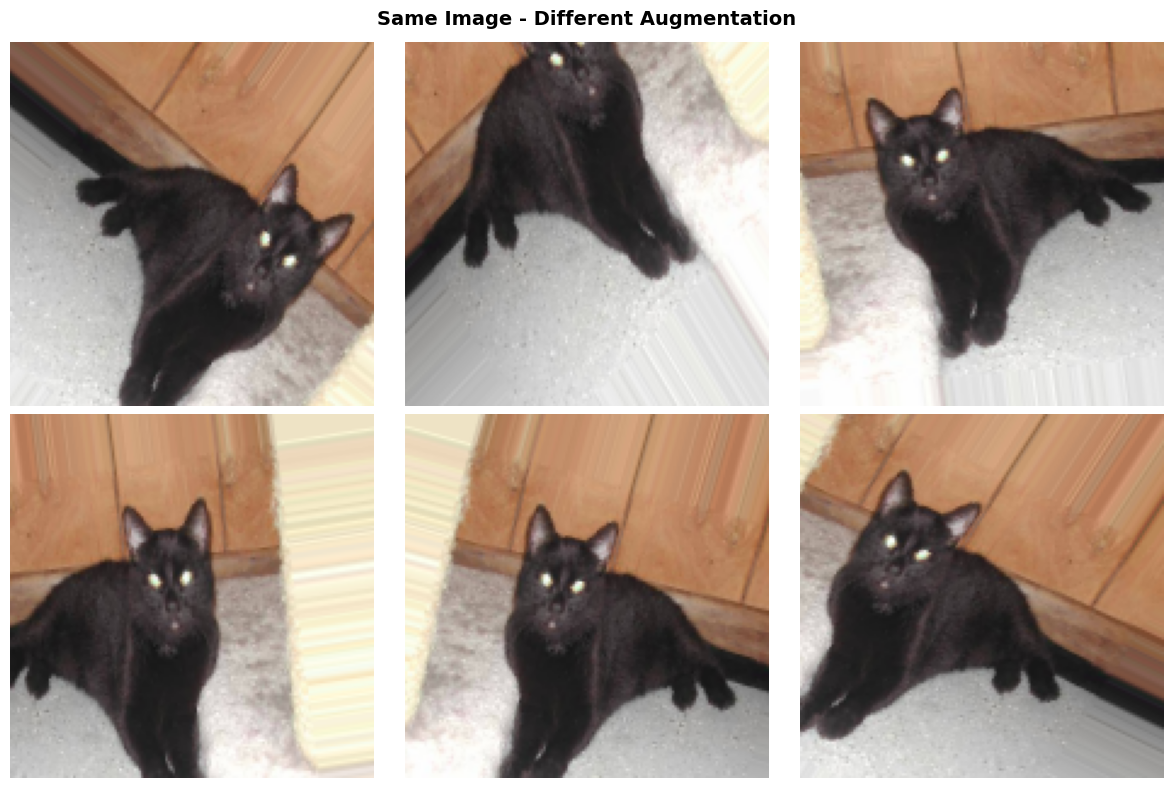

In [17]:
# Testing
import os
sample_cat = os.path.join(DATA_DIR, 'cat', os.listdir(os.path.join(DATA_DIR, 'CAT'))[10])
print(f"\nSample image: {sample_cat}")
show_single_image_augmentation(sample_cat)


In [7]:
# Summary
print("\n" + "=" * 50)
print("Step 3 Summary")
print("=" * 50)
print("Training data: WITH augmentation")
print("Validation data: WITHOUT augmentation (only rescale)")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print("\nNote: Augmentation increases data variety WITHOUT")
print("physically creating new files - it's done on-the-fly!")


Step 3 Summary
Training data: WITH augmentation
Validation data: WITHOUT augmentation (only rescale)
Training samples: 8000
Validation samples: 2000

Note: Augmentation increases data variety WITHOUT
physically creating new files - it's done on-the-fly!


## 4.Data Splitting

In [ ]:
import os
import shutil
import random
from pathlib import Path

#4.1 Configuration 
DATA_DIR = '../datashet'
OUTPUT_DIR = '../data_split'

# Set Split Ratio & Random seed for reproducibility
TRAIN_RATIO = 0.7 
VAL_RATIO = 0.15 
TEST_RATIO = 0.15

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

print("Configuration:")
print(f"Train: {TRAIN_RATIO:.0f}%")
print(f"Validation: {VAL_RATIO:.0f}%")
print(f"Test: {TEST_RATIO:.0f}%")
print(f"Random Seed: {RANDOM_SEED:.0f}%")

#4.2 Create Directory Structure
def create_split_directories(output_dir, classes):
    """Membuat struktur folder untuk splitting data"""
    splits = ['train', 'val', 'test']

    for split in splits:
        for cls in classes:
            path = os.path.join(output_dir, split, cls)
            os.makedirs(path, exist_ok=True)

    print(f"Created directory structure at: {output_dir}")
    print("   ├── train/")
    print("   │   ├── cat/")
    print("   │   └── dog/")
    print("   ├── val/")
    print("   │   ├── cat/")
    print("   │   └── dog/")
    print("   └── test/")
    print("       ├── cat/")
    print("       └── dog/")

classes = ['cat', 'dog']

#4.3 Split & Copy files
def split_data(source_dir, output_dir, classes, train_ratio, val_ratio, test_ratio):
    """Split data ke train/val/test dan copy ke folder masing - masing"""

    stats = {'train': {}, 'val': {}, 'test': {}}

    for cls in classes:
        # get from all class in folder
        class_path = os.path.join(source_dir, cls)
        images = os.listdir(class_path)

        # shuffle for random split
        random.shuffle(images)

        # count every split
        total = len(images)
        train_count = int(total * train_ratio)
        val_count = int(total * val_ratio)
        test_count = total - train_count - val_count

        # split images
        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]

        # copy images to each split folder
        splits_data = [
            ('train', train_images),
            ('val', val_images),
            ('test', test_images)
        ]

        for split_name, split_images in splits_data:
            dest_dir = os.path.join(output_dir, split_name, cls)
            for img in split_images:
                src = os.path.join(class_path, img)
                dst = os.path.join(dest_dir, img)
                shutil.copy2(src, dst)

            stats[split_name][cls] = len(split_images)
        print(f"{cls.upper()}: Train={train_count}, Val={val_count}, Test={test_count}")

        return stats

print("\nSplitting and Copying Data...")
print("=" * 50)
stats = split_data(DATA_DIR, OUTPUT_DIR, classes, TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

In [ ]:
#Summary Statistics
import matplotlib.pyplot as plt
import numpy as np 

print("\n" + "=" * 50)
print("SPLIT SUMMARY ")
print("=" * 50)

# calculate totals
